In [387]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


params ={'axes.labelsize' : 20,
         'axes.titlesize' : 20,
         'xtick.labelsize' : 15,
         'ytick.labelsize' : 15,}
plt.rcParams.update(params)

from matplotlib.colors import LogNorm
import numpy as np
import math
from numpy import linalg as LA

## LOADING DATA

In [388]:
dir_name = "/Users/ankitanegi/Documents/project 2 - PTYCHOGRAPHY/data simulated/"

In [389]:
#reading intensity data from experiment
Edetuning= np.loadtxt(dir_name+"Edetuning.txt ")
ProbeSpectrum = np.loadtxt(dir_name+"ProbeSpectrum.txt ") #Intensity
ObjectSpectrum = np.loadtxt(dir_name+"ObjectSpectrum.txt ")
ComplexObjectSpectrum = np.loadtxt(dir_name+"ObjectCoefficient.txt ", dtype=np.complex_)


#plt.plot(data[:,0],data[:,1])

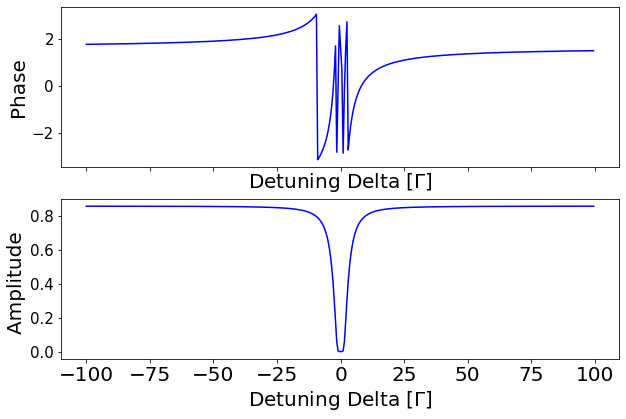

In [390]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(312, xlabel='Detuning Delta [$\Gamma$]', ylabel='Amplitude ')
plt.plot(Edetuning, np.abs(ComplexObjectSpectrum),color ='blue')
plt.setp(ax1.get_xticklabels(), fontsize=20)

# share x only
ax2 = plt.subplot(311, sharex=ax1, xlabel='Detuning Delta [$\Gamma$]', ylabel='Phase')
plt.plot(Edetuning, np.angle(ComplexObjectSpectrum),color ='blue')
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

plt.show()

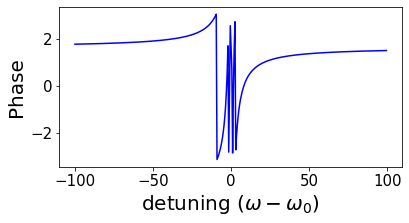

In [391]:
plt.figure(figsize=(10,10))
ax = plt.subplot(313, xlabel='detuning $(\omega - \omega_0)$',
                 ylabel='Phase', aspect =15)
ax.plot(Edetuning, np.angle(ComplexObjectSpectrum),color ='blue')
plt.show()

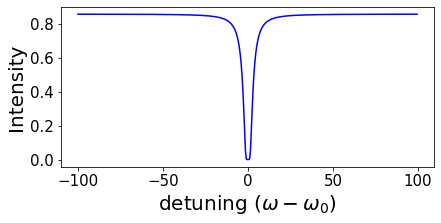

In [392]:
plt.figure(figsize=(10,10))
ax = plt.subplot(313, xlabel='detuning $(\omega - \omega_0)$',
                 ylabel='Intensity', aspect =100)
ax.plot(Edetuning, np.abs(ComplexObjectSpectrum),color ='blue')
plt.show()

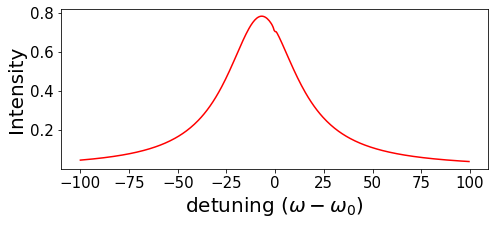

In [492]:
plt.figure(figsize=(10,10))
ax = plt.subplot(313, xlabel='detuning $(\omega - \omega_0)$',
                 ylabel='Intensity', aspect =100)
ax.plot(Edetuning, ProbeSpectrum, color ='red')
plt.show()

In [495]:
#function to generate a spectrum with some energy detuning:

def get_spectrum(delta_E, Edetuning, ProbeSpectrum, ComplexObjectSpectrum): #in keV
    #1. take sample spectrum
    #2. take detuned masked spectrum
    ShiftedProbeSpectrum = Eshift(ProbeSpectrum,Edetuning,delta_E,0 )
    #3. convolute and get the image at the detector
    #4. GET A LIST of images with different detunings
    #w=Edetuning
    #mask_w_0= 14.4 #(keV)
    #mask_fwhm_0= 1 #neV
    #mask_amp = 1/(1+4*(w-(mask_w_0+E_detuning))**2/mask_fwhm_0**2)
    mask_phase = -math.pi*ShiftedProbeSpectrum
    
    exit_wave= ShiftedProbeSpectrum*np.exp(1j*mask_phase)*ComplexObjectSpectrum
    detector_img= np.fft.fft(exit_wave)

    time_data = np.linspace(0,1/abs(Edetuning[1]-Edetuning[0])*4135, len(exit_wave)) # the plot of frequencies
    return time_data, np.abs(detector_img)**2, ShiftedProbeSpectrum*np.exp(1j*mask_phase)

In [496]:
#simulate experimental data
img_data=[]
detuned_mask_data =[]

for delta_E in MBDetunings: #detuning unit in gamma, 50 copies of detuned measurements
    time_data, ydata, mask_data = get_spectrum(delta_E, Edetuning, ProbeSpectrum, ComplexObjectSpectrum)
    #ydata[45:]=0
    img_data.append(ydata)
    detuned_mask_data.append(mask_data)
measured_data_list=np.stack(img_data, axis=0) #201 Real measured Intensity spectra
mask_data_list = np.stack(detuned_mask_data, axis=0) #201 Complex Mask spectra

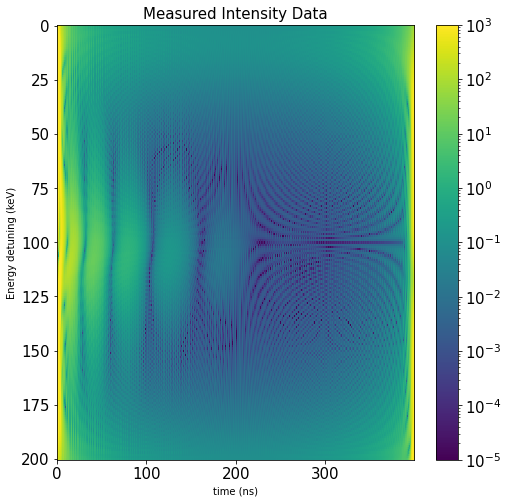

In [497]:
plt.figure(figsize=(8,8))
plt.title('Measured Intensity Data', fontsize=15)
plt.imshow(measured_data_list,interpolation='nearest',aspect='auto',norm=LogNorm(1e-5, 1e3))
plt.xlabel('time (ns)', fontsize=10)
plt.ylabel('Energy detuning (keV)', fontsize=10)
plt.colorbar()
plt.show()

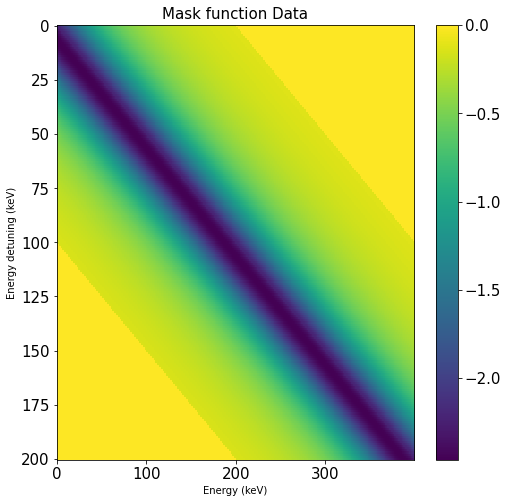

In [500]:
plt.figure(figsize=(8,8))
plt.xlabel('Energy (keV)', fontsize=10)
plt.ylabel('Energy detuning (keV)', fontsize=10)
plt.title('Mask function Data', fontsize=15)
plt.imshow(np.angle(mask_data_list),interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

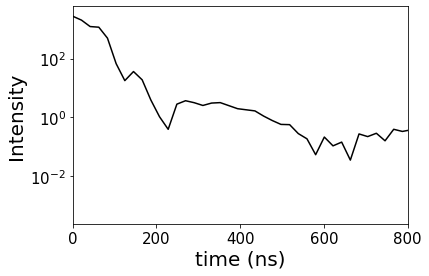

In [501]:
fig,ax= plt.subplots()
#ax.set_xlim(100)
ax.semilogy(time_data,measured_data_list[50], color = "black")
#ax.plot(w, exp_phase)
ax.set_xlim([0,800])
ax.set(xlabel = "time (ns)",
       ylabel = "Intensity")
#ax.xaxis.label.set_size(20)
#ax.yaxis.label.set_size(20)
plt.show()

In [510]:
Tmatrix = np.loadtxt(dir_name+"Tmatrix.txt ")
Times = np.loadtxt(dir_name+"Times.txt ")
MBDetunings = np.loadtxt(dir_name+"MBDetunings.txt ")

In [511]:
#MBDetunings = np.arange(-100, 100, 1.0)
#Times = np.arange(0, 256, 1.0)
(Times[-1] - Times[0])

220.78922955811365

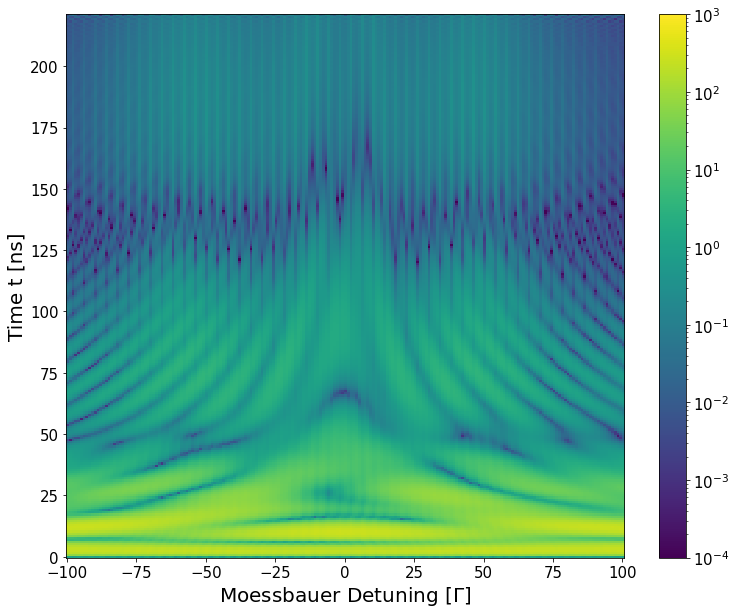

In [512]:
plt.figure(figsize=(12.5,10))
ax = plt.subplot(    111, xlabel='Moessbauer Detuning [$\Gamma$]',
    ylabel='Time t [ns]')
MBDStepHalf = 0.5 * (MBDetunings[1] - MBDetunings[0])
TStepHalf = 0.5 * (Times[1] - Times[0])
ImageExtent = (MBDetunings[0] - MBDStepHalf,
               MBDetunings[-1] + MBDStepHalf,
               Times[0] - TStepHalf,
               Times[-1] + TStepHalf)
p = ax.imshow( Tmatrix,  aspect='auto', extent=ImageExtent,
    origin='lower', interpolation='none', norm=LogNorm(1e-4, 1e3))
plt.colorbar(p)
#plt.savefig('detuned.png')
plt.show()

In [513]:
def Eshift(ProbeSpectrum, Edetuning, Eshift, fill_value=0):
    result = np.empty_like(ProbeSpectrum)
    num = int(Eshift/abs(Edetuning[1]-Edetuning[0]))
    
    if num > 0:
        result[:num] = fill_value
        result[num:] = ProbeSpectrum[:-num]
    elif num < 0:
        result[num:] = fill_value
        result[:num] = ProbeSpectrum[-num:]
    else:
        result[:] = ProbeSpectrum
    return result

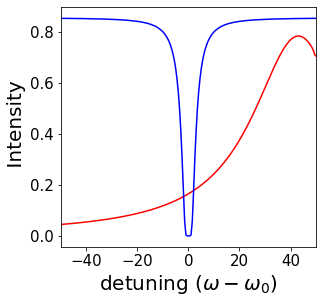

In [514]:
i=150


plt.figure(figsize=(15,15))
ax = plt.subplot(313, xlabel='detuning $(\omega - \omega_0)$',
                 ylabel=' Intensity', aspect =100)
ax.set_xlim([-50,50])
shifted_Probe= Eshift(ProbeSpectrum,Edetuning,MBDetunings[i],0 )
ax.plot(Edetuning,shifted_Probe, color ='red')
plt.plot(Edetuning, np.abs(ComplexObjectSpectrum),color = 'blue')
#plt.plot(Edetuning, np.angle(ComplexObjectSpectrum))
plt.show()

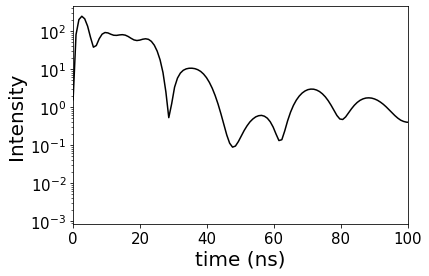

In [515]:
fig,ax= plt.subplots()
ax.set_xlim(100)
ax.semilogy(Times,Tmatrix[:,i], color = "black")
#ax.plot(w, exp_phase)
ax.set_xlim([0,100])
ax.set(xlabel = "time (ns)",
       ylabel = "Intensity")
#ax.xaxis.label.set_size(20)
#ax.yaxis.label.set_size(20)

plt.show()

## RUNNING CALCULATIONS ON THE DATA

### PIE ALGORITHM

In [516]:
def HannosMethod(mask_data_list, measured_data_list, obj_0, alpha, beta,max_iter):
    
    obj_n = obj_0
    z_c = np.zeros_like(obj_0)
    for n in range(0,max_iter):
        
        L= len(mask_data_list)
        
        
        for i in range(L): #iterates over all different probe positions i

            #for the i-th copy of the measured signal

            a = mask_data_list[i] #probe function
            a_star = np.conj(a) #probe* function
            psi_guess= a*obj_n #exit wave
            z= np.fft.ifft(psi_guess) # exit wave in time plane
            #z_c[:180]= z[:180]
            
            b = np.sqrt(measured_data_list[i]) #b_i = sqrt(I_i) real measured amplitude of the convoluted signal
            b = b/LA.norm(b) #normalise b
            z_c =b*np.angle(z) # z_c(t) corrected conv signal guess in t domain
            psi_corrected =  np.fft.fft(z_c) #corrected exit wave
            
            #object update
            #obj_n = obj_n+ beta* abs(a)/max(abs(a)) *  abs(a)/(abs(a)**2 + alpha)*(psi_corrected-psi_guess)
            obj_n = obj_n+ alpha* 1/( max(abs(a))**2 +0.0000001) *(a_star)*(psi_corrected-psi_guess)
            obj_n = obj_n+ alpha* 1/( max(abs(a))**2 +0.0000001) *(a_star)*(psi_corrected-psi_guess)
        
        
        
    #print('Exceeded maximum iterations. No solution found.')
            
    return obj_n

In [517]:
def MyHannosMethod(mask_data_list, measured_data_list, obj_0, alpha, beta,max_iter):
    
    obj_n = obj_0

    L= len(mask_data_list)
    for i in range(L): #iterates over all different probe positions i
        z_c = np.zeros_like(obj_n)
        a = mask_data_list[i]
        a_star = np.conj(a)
        for n in range(0,max_iter):

            #for the i-th copy of the measured signal
            psi_guess= a*obj_n #Z(w) convoluted signal guess in w domain
            z= np.fft.ifft(psi_guess) # z(t) #convoluted signal guess in time domain
            #z_c[:180]= z[:180] # cut off the guess of the signal to 180 ns
            
            b = np.sqrt(measured_data_list[i]) #b_i = sqrt(I_i) real measured amplitude of the convoluted signal
            b = b/LA.norm(b) #normalise b
            z_c =b*np.angle(z) # z_c(t) corrected conv signal guess in t domain
            psi_corrected =  np.fft.fft(z_c) #corrected conv signal guess in w domain
            
            #OBJECT UPDATE
            obj_n = obj_n + alpha*
        
        
        
    #print('Exceeded maximum iterations. No solution found.')
            
    return obj_n

SyntaxError: invalid syntax (<ipython-input-517-9de9b341d973>, line 23)

In [518]:
img_data=[]
detuned_mask_data =[]
i=0
for delta_E in MBDetunings: #detuning unit in gamma, 200 copies of detuned measurements
    mask_data= Eshift(ProbeSpectrum,Edetuning,delta_E,0 )
    img_data.append(np.pad(Tmatrix[:,i],  (0,len(ProbeSpectrum)-len(Tmatrix[:,i])), 'constant')) #zero pad the intensity data
    detuned_mask_data.append(mask_data)
    i+=1
measured_data_list=np.stack(img_data, axis=0) #201 Real measured Intensity spectra
mask_data_list = np.stack(detuned_mask_data, axis=0) #201 Complex Mask spectra

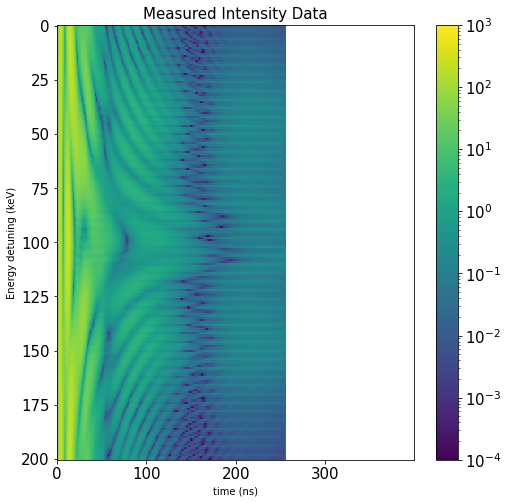

In [519]:
plt.figure(figsize=(8,8))
plt.title('Measured Intensity Data', fontsize=15)
plt.imshow(measured_data_list,interpolation='nearest',aspect='auto',norm=LogNorm(1e-4, 1e3))
plt.xlabel('time (ns)', fontsize=10)
plt.ylabel('Energy detuning (keV)', fontsize=10)
plt.colorbar()
plt.show()

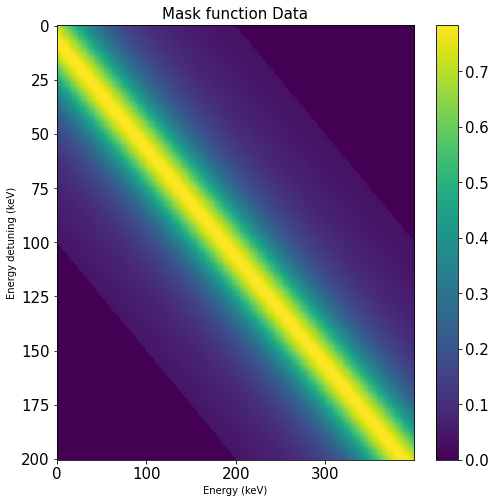

In [520]:
plt.figure(figsize=(8,8))
plt.xlabel('Energy (keV)', fontsize=10)
plt.ylabel('Energy detuning (keV)', fontsize=10)
plt.title('Mask function Data', fontsize=15)
plt.imshow(abs(mask_data_list),interpolation='nearest',aspect='auto')
plt.colorbar()
plt.show()

## Initialize object spectrum

In [521]:
obj_0 = np.random.random(len(mask_data_list[0]))*np.exp(1j*np.random.random(len(mask_data_list[0])))

<Figure size 1800x1800 with 0 Axes>

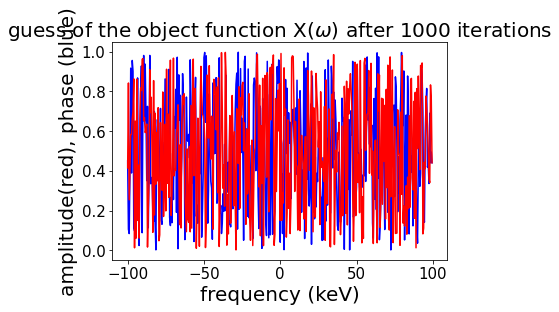

In [522]:
plt.figure(figsize=(25,25))
fig,ax= plt.subplots()
ax.plot(Edetuning, np.angle(obj_0), color = "blue")
ax.plot(Edetuning, np.abs(obj_0), color = "red")
#ax.plot(w, exp_phase)
ax.set(xlabel = "frequency (keV)",
       ylabel = "amplitude(red), phase (blue)",
       title = "guess of the object function X($\omega$) after " +str(max_iter)+" iterations")
plt.show()

In [523]:
#apply the Hanno method

# choice of beta??
alpha = 0.001
beta = 0.1
max_iter = 1000
approx_obj = HannosMethod(np.sqrt(mask_data_list), measured_data_list, obj_0, alpha, beta,max_iter)


#print(approx_obj) #give the x for which p(x)=0

<Figure size 1800x1800 with 0 Axes>

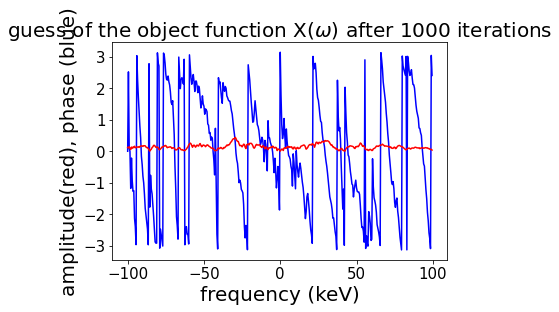

In [524]:
plt.figure(figsize=(25,25))
fig,ax= plt.subplots()
ax.plot(Edetuning, np.angle(approx_obj), color = "blue")
ax.plot(Edetuning, np.abs(approx_obj), color = "red")
#ax.plot(w, exp_phase)
ax.set(xlabel = "frequency (keV)",
       ylabel = "amplitude(red), phase (blue)",
       title = "guess of the object function X($\omega$) after " +str(max_iter)+" iterations")
plt.show()